# Titanic Survival Prediction - Kaggle Competition
Problem Statement: Predict which passengers survived the Titanic shipwreck.

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [246]:
def data_analysis(df):  
    print(f'Shape : {df.shape}\n')
    print(f'Columns : {df.columns}\n')
    print(f"Sample: \n{df.sample(3)}\n")
    print(f"Null values: \n{df.isnull().sum()}\n")



In [247]:
original_train_df = pd.read_csv('../data/train.csv')
df = original_train_df.copy()
data_analysis(df)

Shape : (891, 12)

Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Sample: 
     PassengerId  Survived  Pclass  \
134          135         0       2   
628          629         0       3   
161          162         1       2   

                                                  Name     Sex   Age  SibSp  \
134                     Sobey, Mr. Samuel James Hayden    male  25.0      0   
628                          Bostandyeff, Mr. Guentcho    male  26.0      0   
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  female  40.0      0   

     Parch      Ticket     Fare Cabin Embarked  
134      0  C.A. 29178  13.0000   NaN        S  
628      0      349224   7.8958   NaN        S  
161      0  C.A. 33595  15.7500   NaN        S  

Null values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp        

### Relevant columns 
- Sex - Women are given more priority
- Age - Children and the elderly are given more priority
- Pclass - High-class people are given more priority

In [219]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [220]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [221]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [222]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Data Cleaning

### Age 
Age has 177 null  values, so handling that 

<Axes: xlabel='Age', ylabel='Count'>

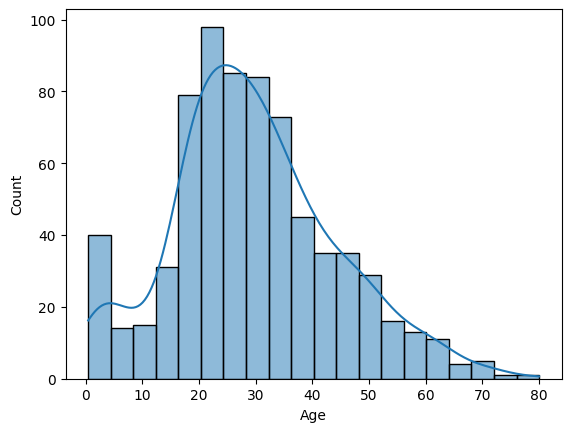

In [223]:
# visualize the age distribution
sns.histplot(df.Age, kde=True)

Text(0.5, 1.0, 'Age vs Survival')

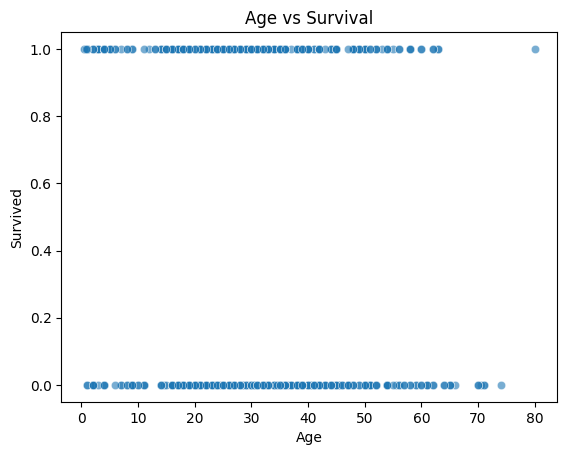

In [224]:
sns.scatterplot(data=df, x='Age', y='Survived', alpha=0.6)
plt.title('Age vs Survival')

In [225]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<Axes: xlabel='AgeGroup', ylabel='count'>

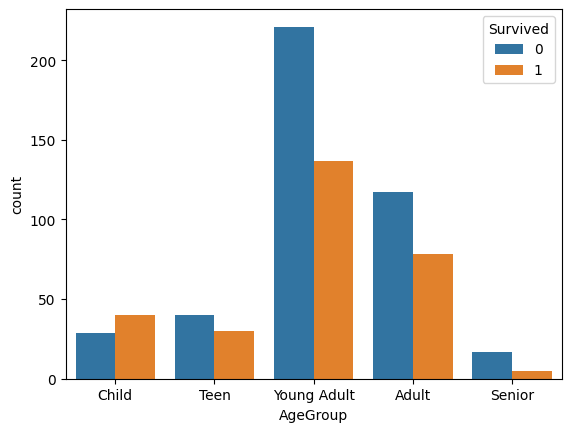

In [226]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(data=df, x='AgeGroup', hue='Survived')

<Axes: xlabel='Age', ylabel='Fare'>

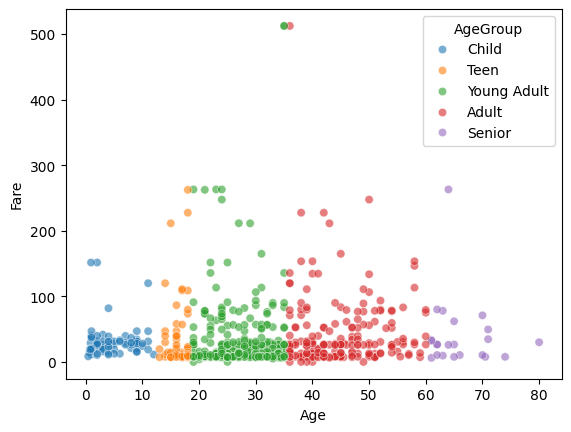

In [227]:
# relation beween fare and AgeGroup
sns.scatterplot(data=df, x='Age', y='Fare', hue='AgeGroup', alpha=0.6)

/var/folders/s1/h1lgxgnj5lbf13m4hl8mjjwr0000gn/T/ipykernel_5955/548215541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_fare = df.groupby('AgeGroup')['Fare'].mean().reset_index()


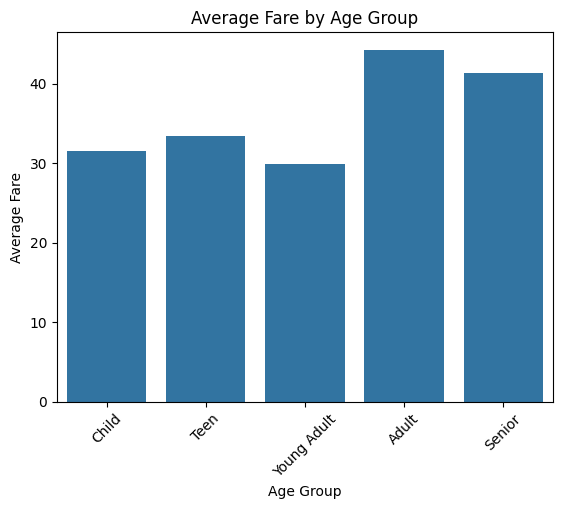

In [228]:
mean_fare = df.groupby('AgeGroup')['Fare'].mean().reset_index()
sns.barplot(data=mean_fare, x='AgeGroup', y='Fare')
plt.title('Average Fare by Age Group')
plt.ylabel('Average Fare')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()



In [229]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,Young Adult,Miss
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Mr
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,Young Adult,Mrs
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,Young Adult,Mr
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,Young Adult,Mr


In [230]:
# view number of na values in each title group
df.groupby('Title').Age.apply(lambda x: x.isnull().sum())

Title
Capt          0
Col           0
Countess      0
Don           0
Dr            1
Jonkheer      0
Lady          0
Major         0
Master        4
Miss         36
Mlle          0
Mme           0
Mr          119
Mrs          17
Ms            0
Rev           0
Sir           0
Name: Age, dtype: int64

In [231]:
title_age_map = df.groupby('Title')['Age'].median()
title_age_map

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [232]:
df['Age'] = df.apply(
    lambda row: title_age_map[row['Title']] if pd.isnull(row['Age']) else row['Age'], 
    axis=1
)

<Axes: xlabel='AgeGroup', ylabel='count'>

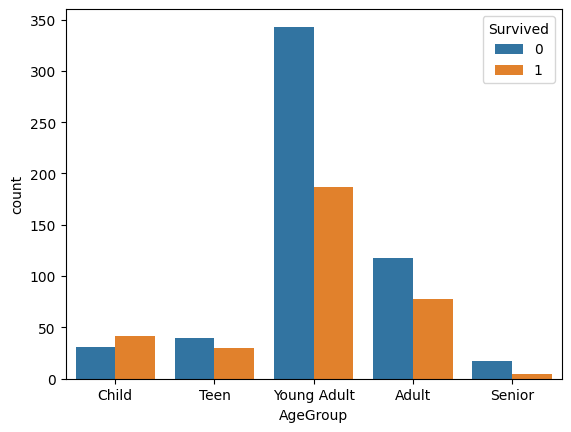

In [233]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(data=df, x='AgeGroup', hue='Survived')

In [234]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,Mr


/var/folders/s1/h1lgxgnj5lbf13m4hl8mjjwr0000gn/T/ipykernel_5955/2825365418.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup_Binary')['Survived'].mean()


AgeGroup_Binary
Child    0.580247
Adult    0.364198
Name: Survived, dtype: float64

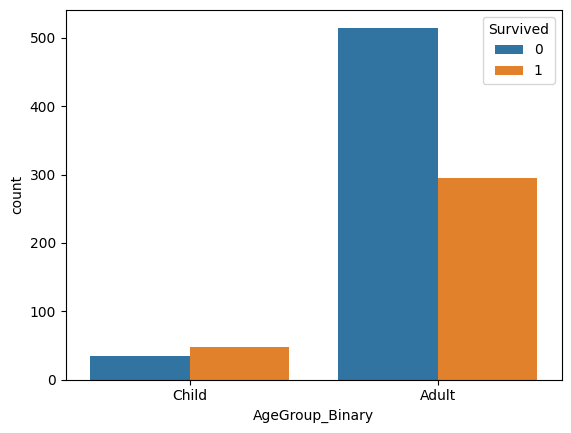

In [235]:
# divide into below 18 and above 18
df['AgeGroup_Binary'] = pd.cut(df['Age'], bins=[0, 14, 100], labels=['Child', 'Adult'])
sns.countplot(data=df, x='AgeGroup_Binary', hue='Survived')
# print survival rate 
df.groupby('AgeGroup_Binary')['Survived'].mean()

### Sex column
No outliers or null values, moving on...

In [236]:
df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
AgeGroup             0
Title                0
AgeGroup_Binary      0
dtype: int64

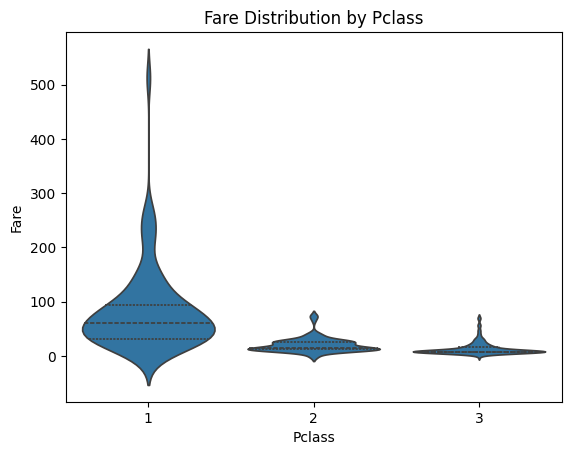

In [237]:
sns.violinplot(data=df, x='Pclass', y='Fare', density_norm='width', inner='quartile')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


<Axes: xlabel='FamilySize', ylabel='count'>

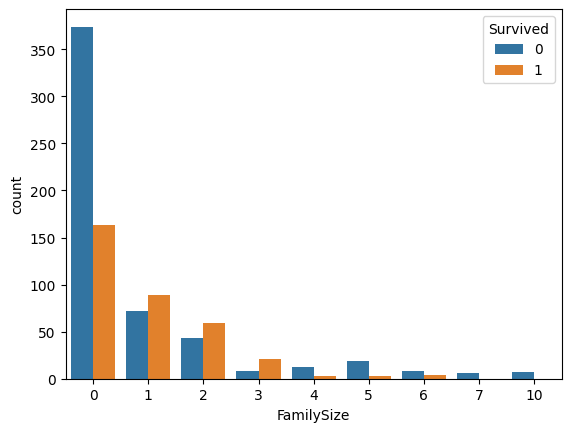

In [238]:
# survival rate by sibsp and parch
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot(data=df, x='FamilySize', hue='Survived')

### Considering family size too now 

In [239]:
df_cleaned = df[['Pclass', 'Sex', 'AgeGroup_Binary', 'FamilySize', 'Survived']]
data_analysis(df_cleaned)

Shape : (891, 5)

Columns : Index(['Pclass', 'Sex', 'AgeGroup_Binary', 'FamilySize', 'Survived'], dtype='object')

Sample: 
     Pclass   Sex AgeGroup_Binary  FamilySize  Survived
601       3  male           Adult           0         0
495       3  male           Adult           0         0
185       1  male           Adult           0         0

Null values: 
Pclass             0
Sex                0
AgeGroup_Binary    0
FamilySize         0
Survived           0
dtype: int64



### Encoding Sex Column

In [240]:
df_cleaned['SexEncoded'] = df_cleaned['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_cleaned.head()

/var/folders/s1/h1lgxgnj5lbf13m4hl8mjjwr0000gn/T/ipykernel_5955/3017918665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SexEncoded'] = df_cleaned['Sex'].apply(lambda x: 1 if x == 'male' else 0)


,Pclass,Sex,AgeGroup_Binary,FamilySize,Survived,SexEncoded
0,3,male,Adult,1,0,1
1,1,female,Adult,1,1,0
2,3,female,Adult,0,1,0
3,1,female,Adult,1,1,0
4,3,male,Adult,0,0,1


In [241]:
df_cleaned['AgeGroupEncoded'] = df_cleaned['AgeGroup_Binary'].apply(lambda x: 1 if x == 'Adult' else 0)
df_cleaned.head()

/var/folders/s1/h1lgxgnj5lbf13m4hl8mjjwr0000gn/T/ipykernel_5955/88889995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroupEncoded'] = df_cleaned['AgeGroup_Binary'].apply(lambda x: 1 if x == 'Adult' else 0)


,Pclass,Sex,AgeGroup_Binary,FamilySize,Survived,SexEncoded,AgeGroupEncoded
0,3,male,Adult,1,0,1,1
1,1,female,Adult,1,1,0,1
2,3,female,Adult,0,1,0,1
3,1,female,Adult,1,1,0,1
4,3,male,Adult,0,0,1,1


In [242]:
df_cleaned.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [243]:
df_cleaned.to_csv('../data/cleaned_train.csv', index=False)